In [1]:
# Import packages we'll need later on in this tutorial
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import math

# Import BW25 packages. You'll notice the packages are imported individually, unlike a one-and-done import with BW2.
import bw2data as bd
import bw2io as bi
import bw2calc as bc
import bw2analyzer as bwa
import brightway2 as bw 
from bw2calc import LeastSquaresLCA 

In [2]:
# If you're just starting out, this should only have "default" in it.
# Else, you'll see all the previous projects you've worked on.

bd.projects

Brightway2 projects manager with 9 objects:
	Assorted bellpepers
	Assorted pineapples
	Mango
	Mixed veggies :)
	RA - Ofir & Stine
	RA - Ofir & Stine 1
	RA - Rune
	RA - copy
	default
Use `projects.report()` to get a report on all projects.

In [3]:
# Your name variable should be the name of the project.

name = "RA - Ofir & Stine 1"
bd.projects.set_current(name)

In [4]:
bd.projects.dir

'C:\\Users\\ruw\\AppData\\Local\\pylca\\Brightway3\\RA-Ofir-Stine-1.f6415da22c370aad3b4b860fb280820d'

In [5]:
# If this is your first time using this BW25 project, this should be an empty dictionary! 
bd.databases

Databases dictionary with 10 object(s):
	APOS EcoInevnt
	Ananas
	Ananas consq
	Consq EcoInvent
	Lobster APOS
	Lobster consq
	Ofir consq
	Ofir consq1
	Stine consq - updated
	biosphere3

In [6]:
# If this is the first time you've set up the project, you need to install the biosphere flows.
# You do not need to run this subsequent times.

bi.bw2setup() ## THIS YIELDS AN ERROR AT THE MOMENT

Biosphere database already present!!! No setup is needed


In [7]:
eidb1 = bd.Database("Lobster APOS")
print("The imported ecoinvent database is of type {} and has a length of {}.".format(type(eidb1), len(eidb1)))

eidb2 = bd.Database("Lobster consq")
print("The imported ecoinvent database is of type {} and has a length of {}.".format(type(eidb2), len(eidb2)))


The imported ecoinvent database is of type <class 'bw2data.backends.peewee.database.SQLiteBackend'> and has a length of 23.
The imported ecoinvent database is of type <class 'bw2data.backends.peewee.database.SQLiteBackend'> and has a length of 23.


In [8]:
# for process in eidb1:
#     print(process)

for process in eidb1:
    print(process)


'sc1 Diathermy' (unit, GLO, None)
'sc1 Transport' (ton kilometer, GLO, None)
'PE incineration no Energy Recovery - APOS' (kilogram, CH, None)
'treatment of municipal solid waste, municipal incineration with fly ash extraction' (kilogram, CH, None)
'sc2' (unit, GLO, None)
'sc2 Transport' (ton kilometer, GLO, None)
'mixed heating grid' (megajoule, GLO, None)
'sc2 Remanufacturing DE' (unit, GLO, None)
'sc2 Diathermy' (unit, GLO, None)
'sc3 Transport' (ton kilometer, GLO, None)
'treatment of waste plastic, mixture, municipal incineration' (kilogram, CH, None)
'sc2 Waste' (kilogram, GLO, None)
'sc3' (unit, GLO, None)
'sc3 Scalpel (prod) DE' (unit, GLO, None)
'sc2 Erbe - use -DK' (unit, GLO, None)
'sc1 Waste' (kilogram, GLO, None)
'silveralloy AgCu production' (kilogram, GLO, None)
'treatment of hazardous waste, hazardous waste incineration, with energy recovery' (kilogram, Europe without Switzerland, None)
'sc3 Autoclave (use) DK' (unit, GLO, None)
'sc3 Waste' (kilogram, GLO, None)
'sc3 Dis

In [9]:
# process_name = "PP sheet sc2"
process_names = ["sc1",
                 "sc2", 
                 "sc3"]
matches = [0] * len(process_names)*2
for p in range(len(process_names)):
    matches[p] = [act for act in eidb1 if process_names[p].lower() == act['name'].lower()]
    matches[p+3] = [act for act in eidb2 if process_names[p].lower() == act['name'].lower()]

# for p in range(len(process_names)):
#     matches[p] = [act for act in eidb if process_names[p].lower() in act['name'].lower()]

# Select the first match (or whichever is most appropriate)
if matches:
    selected_process = matches  # If there are multiple matches, you can choose another index
    print("Selected process:",len(matches))
else:
    print("No process found with the name:", process_names)



Selected process: 6


In [10]:
# list(bw.methods)

#or use the built-in method
#bw.methods.list

#or the following
#bw.methods.items()

In [11]:
# List all methods containing 'EF v3.1 EN15804'
all_methods = [m for m in bw.methods if 'EF v3.1 EN15804' in str(m)]

# Filter out methods that contain "climate change:" in method[1]
filtered_methods = [method for method in all_methods if "climate change:" not in method[1]]

# Print the methods that were removed
removed_methods = [method[1] for method in all_methods if "climate change:" in method[1]]
print("Removed methods:")
for rm in removed_methods:
    print(rm)

# Optional: Check the length of the filtered list
print(f"Total number of methods after filtering: {len(filtered_methods)}")



Removed methods:
climate change: biogenic
climate change: fossil
climate change: land use and land use change
Total number of methods after filtering: 16


In [12]:
plot_x_axis = [0] * len(filtered_methods)
for i in range(len(plot_x_axis)):
    plot_x_axis[i] = filtered_methods[i][1]
    print(filtered_methods[i][1])


acidification
climate change
ecotoxicity: freshwater
energy resources: non-renewable
eutrophication: freshwater
eutrophication: marine
eutrophication: terrestrial
human toxicity: carcinogenic
human toxicity: non-carcinogenic
ionising radiation: human health
land use
material resources: metals/minerals
ozone depletion
particulate matter formation
photochemical oxidant formation: human health
water use


In [13]:
FU = [0] * len(matches)
for i in range(len(matches)):
    FU[i] = {matches[i][0]:1}

FU

[{'sc1' (unit, GLO, None): 1},
 {'sc2' (unit, GLO, None): 1},
 {'sc3' (unit, GLO, None): 1},
 {'sc1' (unit, GLO, None): 1},
 {'sc2' (unit, GLO, None): 1},
 {'sc3' (unit, GLO, None): 1}]

In [14]:
# Define the dimensions
n = len(matches) # number of rows
m = len(filtered_methods) # number of columns
print(matches[0])

['sc1' (unit, GLO, None)]


In [15]:
idx_list = ['sc 1 - APOS',
            'sc 2 - APOS',
            'sc 3 - APOS',
            'sc 1 - CONSQ',
            'sc 2 - CONSQ',
            'sc3 - CONSQ']

In [16]:
# Define the dimensions
n = len(matches) # number of rows
m = len(filtered_methods) # number of columns

# Create a DataFrame with random data
df = pd.DataFrame(0, index=idx_list, columns=[filtered_methods])
df.head(6)

,"(EF v3.1 EN15804, acidification, accumulated exceedance (AE))","(EF v3.1 EN15804, climate change, global warming potential (GWP100))","(EF v3.1 EN15804, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))","(EF v3.1 EN15804, energy resources: non-renewable, abiotic depletion potential (ADP): fossil fuels)","(EF v3.1 EN15804, eutrophication: freshwater, fraction of nutrients reaching freshwater end compartment (P))","(EF v3.1 EN15804, eutrophication: marine, fraction of nutrients reaching marine end compartment (N))","(EF v3.1 EN15804, eutrophication: terrestrial, accumulated exceedance (AE))","(EF v3.1 EN15804, human toxicity: carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, human toxicity: non-carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, ionising radiation: human health, human exposure efficiency relative to u235)","(EF v3.1 EN15804, land use, soil quality index)","(EF v3.1 EN15804, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))","(EF v3.1 EN15804, ozone depletion, ozone depletion potential (ODP))","(EF v3.1 EN15804, particulate matter formation, impact on human health)","(EF v3.1 EN15804, photochemical oxidant formation: human health, tropospheric ozone concentration increase)","(EF v3.1 EN15804, water use, user deprivation potential (deprivation-weighted water consumption))"
sc 1 - APOS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sc 2 - APOS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sc 3 - APOS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sc 1 - CONSQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sc 2 - CONSQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sc3 - CONSQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
calc_count = 1
for impact in range(m):
    for idx in range(n):
        fu = FU[idx]
        cat = filtered_methods[impact]
        lca = bw.LCA(fu, cat)
        lca.lci()
        lca.lcia()
        df.iat[idx, impact] = lca.score
        print(f"Calculation {calc_count} of {m*n}", fu, cat, lca.score)
        calc_count +=1

df.head(6)

C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.030926903213263683' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 1 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.030926903213263683
Calculation 2 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.020337269180204513
Calculation 3 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.003509719318846788
Calculation 4 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.03207325863937094
Calculation 5 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.016515240150760946
Calculation 6 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.002469192092494932


C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.888897052612024' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 7 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') 2.888897052612024
Calculation 8 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') 3.6940879917336056
Calculation 9 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') 0.6447435784399219
Calculation 10 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') 2.967594004782841
Calculation 11 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') 1.7801341545967164
Calculation 12 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'climate change', 'global warming potential (GWP100)') 0.318290881446087


C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '36.19259421140377' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 13 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)') 36.19259421140377
Calculation 14 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)') 35.33710639709828
Calculation 15 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)') 5.500736058893352
Calculation 16 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)') 26.623937807503328
Calculation 17 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)') 18.42038962676398
Calculation 18 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)') 3.161690346849893


C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '39.74641441897689' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 19 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels') 39.74641441897689
Calculation 20 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels') 35.16066951536883
Calculation 21 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels') 9.705768638204086
Calculation 22 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels') 41.16348229954757
Calculation 23 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels') 20.87111163565338
Calculation 24 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'energy resources: non-renewable', 'abiotic depletion potent

C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0025517581416119534' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 25 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: freshwater', 'fraction of nutrients reaching freshwater end compartment (P)') 0.0025517581416119534
Calculation 26 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: freshwater', 'fraction of nutrients reaching freshwater end compartment (P)') 0.0024686606418099985
Calculation 27 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: freshwater', 'fraction of nutrients reaching freshwater end compartment (P)') 0.0011128535757832646
Calculation 28 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: freshwater', 'fraction of nutrients reaching freshwater end compartment (P)') 0.0020201355980642125
Calculation 29 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: freshwater', 'fraction of nutrients reaching freshwater end compartment (P)') 0.001165796309292664
Calculation 30 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN1580

C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0032948081850346926' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 31 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: marine', 'fraction of nutrients reaching marine end compartment (N)') 0.0032948081850346926
Calculation 32 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: marine', 'fraction of nutrients reaching marine end compartment (N)') 0.004160032688964486
Calculation 33 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: marine', 'fraction of nutrients reaching marine end compartment (N)') 0.001025297964037841
Calculation 34 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: marine', 'fraction of nutrients reaching marine end compartment (N)') 0.003519121566688092
Calculation 35 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: marine', 'fraction of nutrients reaching marine end compartment (N)') 0.001788362720582614
Calculation 36 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: marine', 'fraction of 

C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.03547594085285657' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 37 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: terrestrial', 'accumulated exceedance (AE)') 0.03547594085285657
Calculation 38 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: terrestrial', 'accumulated exceedance (AE)') 0.025801944135881466
Calculation 39 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: terrestrial', 'accumulated exceedance (AE)') 0.006036020403435612
Calculation 40 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: terrestrial', 'accumulated exceedance (AE)') 0.04049280262483572
Calculation 41 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: terrestrial', 'accumulated exceedance (AE)') 0.021072382944185317
Calculation 42 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'eutrophication: terrestrial', 'accumulated exceedance (AE)') 0.006092245892661748


C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.833506877630542e-09' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 43 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'human toxicity: carcinogenic', 'comparative toxic unit for human (CTUh)') 4.833506877630542e-09
Calculation 44 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'human toxicity: carcinogenic', 'comparative toxic unit for human (CTUh)') 3.966848092862746e-09
Calculation 45 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'human toxicity: carcinogenic', 'comparative toxic unit for human (CTUh)') 7.091270336011931e-10
Calculation 46 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'human toxicity: carcinogenic', 'comparative toxic unit for human (CTUh)') 5.546881768875694e-09
Calculation 47 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'human toxicity: carcinogenic', 'comparative toxic unit for human (CTUh)') 3.2928614540579225e-09
Calculation 48 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'human toxicity: carcinogenic', 'comparative toxic unit for human (CTUh)') 6.547151307269098e-

C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5250182984540197e-07' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 49 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'human toxicity: non-carcinogenic', 'comparative toxic unit for human (CTUh)') 2.5250182984540197e-07
Calculation 50 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'human toxicity: non-carcinogenic', 'comparative toxic unit for human (CTUh)') 1.5057764084039102e-07
Calculation 51 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'human toxicity: non-carcinogenic', 'comparative toxic unit for human (CTUh)') 9.52270895463636e-09
Calculation 52 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'human toxicity: non-carcinogenic', 'comparative toxic unit for human (CTUh)') 3.4831758978081337e-07
Calculation 53 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'human toxicity: non-carcinogenic', 'comparative toxic unit for human (CTUh)') 1.8364940996245663e-07
Calculation 54 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'human toxicity: non-carcinogenic', 'comparative toxic unit for human (C

C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2721602837924098' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 55 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ionising radiation: human health', 'human exposure efficiency relative to u235') 0.2721602837924098
Calculation 56 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ionising radiation: human health', 'human exposure efficiency relative to u235') 0.3127161883391649
Calculation 57 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ionising radiation: human health', 'human exposure efficiency relative to u235') 0.12914412013529086
Calculation 58 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ionising radiation: human health', 'human exposure efficiency relative to u235') 0.20799954620530586
Calculation 59 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ionising radiation: human health', 'human exposure efficiency relative to u235') 0.08915242715227346
Calculation 60 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ionising radiation: human health', 'human exposure efficiency relative 

C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.708882614473131' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 61 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'land use', 'soil quality index') 5.708882614473131
Calculation 62 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'land use', 'soil quality index') 9.164074161702427
Calculation 63 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'land use', 'soil quality index') 9.066909586594281
Calculation 64 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'land use', 'soil quality index') 20.472904700614485
Calculation 65 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'land use', 'soil quality index') 13.530726530417992
Calculation 66 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'land use', 'soil quality index') 23.366933342650093


C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.00033812870407735483' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 67 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)') 0.00033812870407735483
Calculation 68 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)') 0.00022957795033833292
Calculation 69 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)') 5.399552495906074e-06
Calculation 70 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)') 0.0007909119879862124
Calculation 71 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)') 0.00045547122478833507
Calcula

C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.8587043134719076e-08' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 73 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ozone depletion', 'ozone depletion potential (ODP)') 4.8587043134719076e-08
Calculation 74 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ozone depletion', 'ozone depletion potential (ODP)') 7.54122585521812e-08
Calculation 75 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ozone depletion', 'ozone depletion potential (ODP)') 1.516617348527296e-08
Calculation 76 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ozone depletion', 'ozone depletion potential (ODP)') 5.522801911069861e-08
Calculation 77 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ozone depletion', 'ozone depletion potential (ODP)') 4.4042773114031986e-08
Calculation 78 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'ozone depletion', 'ozone depletion potential (ODP)') 8.844469716636838e-09


C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.495528389064528e-07' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 79 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'particulate matter formation', 'impact on human health') 1.495528389064528e-07
Calculation 80 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'particulate matter formation', 'impact on human health') 1.1209213274254773e-07
Calculation 81 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'particulate matter formation', 'impact on human health') 2.4409033775997347e-08
Calculation 82 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'particulate matter formation', 'impact on human health') 1.2986612896653958e-07
Calculation 83 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'particulate matter formation', 'impact on human health') 6.525070433520947e-08
Calculation 84 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'particulate matter formation', 'impact on human health') 2.2846613632952614e-08


C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.011141579880623856' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 85 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'photochemical oxidant formation: human health', 'tropospheric ozone concentration increase') 0.011141579880623856
Calculation 86 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'photochemical oxidant formation: human health', 'tropospheric ozone concentration increase') 0.008350521233618432
Calculation 87 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'photochemical oxidant formation: human health', 'tropospheric ozone concentration increase') 0.0017276925762984144
Calculation 88 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'photochemical oxidant formation: human health', 'tropospheric ozone concentration increase') 0.012174805825927813
Calculation 89 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'photochemical oxidant formation: human health', 'tropospheric ozone concentration increase') 0.006446663966214617
Calculation 90 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'pho

C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\600952848.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.102801559145189' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[idx, impact] = lca.score


Calculation 91 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'water use', 'user deprivation potential (deprivation-weighted water consumption)') 1.102801559145189
Calculation 92 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'water use', 'user deprivation potential (deprivation-weighted water consumption)') 1.2867877956457778
Calculation 93 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'water use', 'user deprivation potential (deprivation-weighted water consumption)') 0.538184966133161
Calculation 94 of 96 {'sc1' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'water use', 'user deprivation potential (deprivation-weighted water consumption)') 0.7540495973446132
Calculation 95 of 96 {'sc2' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'water use', 'user deprivation potential (deprivation-weighted water consumption)') 0.34627996283184814
Calculation 96 of 96 {'sc3' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'water use', 'user deprivation potential (deprivation-weighted wat

,"(EF v3.1 EN15804, acidification, accumulated exceedance (AE))","(EF v3.1 EN15804, climate change, global warming potential (GWP100))","(EF v3.1 EN15804, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))","(EF v3.1 EN15804, energy resources: non-renewable, abiotic depletion potential (ADP): fossil fuels)","(EF v3.1 EN15804, eutrophication: freshwater, fraction of nutrients reaching freshwater end compartment (P))","(EF v3.1 EN15804, eutrophication: marine, fraction of nutrients reaching marine end compartment (N))","(EF v3.1 EN15804, eutrophication: terrestrial, accumulated exceedance (AE))","(EF v3.1 EN15804, human toxicity: carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, human toxicity: non-carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, ionising radiation: human health, human exposure efficiency relative to u235)","(EF v3.1 EN15804, land use, soil quality index)","(EF v3.1 EN15804, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))","(EF v3.1 EN15804, ozone depletion, ozone depletion potential (ODP))","(EF v3.1 EN15804, particulate matter formation, impact on human health)","(EF v3.1 EN15804, photochemical oxidant formation: human health, tropospheric ozone concentration increase)","(EF v3.1 EN15804, water use, user deprivation potential (deprivation-weighted water consumption))"
sc 1 - APOS,0.030927,2.888897,36.192594,39.746414,0.002552,0.003295,0.035476,4.833507e-09,2.525018e-07,0.272160,5.708883,0.000338,4.858704e-08,1.495528e-07,0.011142,1.102802
sc 2 - APOS,0.020337,3.694088,35.337106,35.160670,0.002469,0.004160,0.025802,3.966848e-09,1.505776e-07,0.312716,9.164074,0.000230,7.541226e-08,1.120921e-07,0.008351,1.286788
sc 3 - APOS,0.003510,0.644744,5.500736,9.705769,0.001113,0.001025,0.006036,7.091270e-10,9.522709e-09,0.129144,9.066910,0.000005,1.516617e-08,2.440903e-08,0.001728,0.538185
sc 1 - CONSQ,0.032073,2.967594,26.623938,41.163482,0.002020,0.003519,0.040493,5.546882e-09,3.483176e-07,0.208000,20.472905,0.000791,5.522802e-08,1.298661e-07,0.012175,0.754050
sc 2 - CONSQ,0.016515,1.780134,18.420390,20.871112,0.001166,0.001788,0.021072,3.292861e-09,1.836494e-07,0.089152,13.530727,0.000455,4.404277e-08,6.525070e-08,0.006447,0.346280
sc3 - CONSQ,0.002469,0.318291,3.161690,5.597412,0.000121,0.000735,0.006092,6.547151e-10,9.906923e-09,0.014006,23.366933,0.000010,8.844470e-09,2.284661e-08,0.001593,0.208714


In [18]:
# determining the name of the file
file_name = r'C:\Users\ruw\Desktop\RA\Results\Lobster.xlsx'
sheet_name = 'Lobster'
# creating an ExcelWriter object
with pd.ExcelWriter(file_name) as writer:
    # writing to the 'Employee' sheet
    df.to_excel(writer, sheet_name=sheet_name, index=True)
print('DataFrames are written to Excel File successfully.')

DataFrames are written to Excel File successfully.


In [19]:
df_cols = df.columns
df_cols = df_cols.to_list()


In [20]:

df_norm = pd.DataFrame().reindex_like(df) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
for i in df_cols:
    scaling_factor = max(abs(df[i]))
    for j in range(len(df[df_cols[0]])):
        df_norm[i][j] =df[i][j]/scaling_factor
        #print(scaling_factor, i)
# for j in range(len(data['Index'])):
#     df_norm['Index'][j] = df['Index'][j]


# Selecting the columns from 1th column onwards
columns_to_plot = df_norm.columns
df_norm.head(6)

C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\1482910106.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_norm[i][j] =df[i][j]/scaling_factor
C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\1482910106.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignm

,"(EF v3.1 EN15804, acidification, accumulated exceedance (AE))","(EF v3.1 EN15804, climate change, global warming potential (GWP100))","(EF v3.1 EN15804, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))","(EF v3.1 EN15804, energy resources: non-renewable, abiotic depletion potential (ADP): fossil fuels)","(EF v3.1 EN15804, eutrophication: freshwater, fraction of nutrients reaching freshwater end compartment (P))","(EF v3.1 EN15804, eutrophication: marine, fraction of nutrients reaching marine end compartment (N))","(EF v3.1 EN15804, eutrophication: terrestrial, accumulated exceedance (AE))","(EF v3.1 EN15804, human toxicity: carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, human toxicity: non-carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, ionising radiation: human health, human exposure efficiency relative to u235)","(EF v3.1 EN15804, land use, soil quality index)","(EF v3.1 EN15804, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))","(EF v3.1 EN15804, ozone depletion, ozone depletion potential (ODP))","(EF v3.1 EN15804, particulate matter formation, impact on human health)","(EF v3.1 EN15804, photochemical oxidant formation: human health, tropospheric ozone concentration increase)","(EF v3.1 EN15804, water use, user deprivation potential (deprivation-weighted water consumption))"
sc 1 - APOS,0.964258,0.782033,1.000000,0.965575,1.000000,0.792015,0.876105,0.871392,0.724918,0.870311,0.244315,0.427517,0.644286,1.000000,0.915134,0.857019
sc 2 - APOS,0.634088,1.000000,0.976363,0.854171,0.967435,1.000000,0.637198,0.715149,0.432300,1.000000,0.392181,0.290270,1.000000,0.749515,0.685885,1.000000
sc 3 - APOS,0.109428,0.174534,0.151985,0.235786,0.436112,0.246464,0.149064,0.127842,0.027339,0.412975,0.388023,0.006827,0.201110,0.163213,0.141907,0.418239
sc 1 - CONSQ,1.000000,0.803336,0.735618,1.000000,0.791664,0.845936,1.000000,1.000000,1.000000,0.665138,0.876149,1.000000,0.732348,0.868363,1.000000,0.585994
sc 2 - CONSQ,0.514922,0.481887,0.508955,0.507030,0.456860,0.429892,0.520398,0.593642,0.527247,0.285091,0.579054,0.575881,0.584027,0.436305,0.529509,0.269104
sc3 - CONSQ,0.076986,0.086162,0.087357,0.135980,0.047490,0.176575,0.150453,0.118033,0.028442,0.044788,1.000000,0.013041,0.117282,0.152766,0.130822,0.162197


In [21]:
# cmap = plt.get_cmap('tab20b')
# colors = [cmap(i) for i in np.linspace(0, 1, 20)]

colors = ["#789D4A",
          "#E07E3C",
          "#7A6040",
          "#E1BBB4",
          "#D05A57",
          "#F2C75C",
          "#DDCBA4",
          "#AEB862",
          "#000000"]

In [22]:
index_list = list(df.index.values)
index_list

['sc 1 - APOS',
 'sc 2 - APOS',
 'sc 3 - APOS',
 'sc 1 - CONSQ',
 'sc 2 - CONSQ',
 'sc3 - CONSQ']

In [23]:
f = columns_to_plot[1]

In [24]:
print(len(columns_to_plot),len(filtered_methods))

16 16


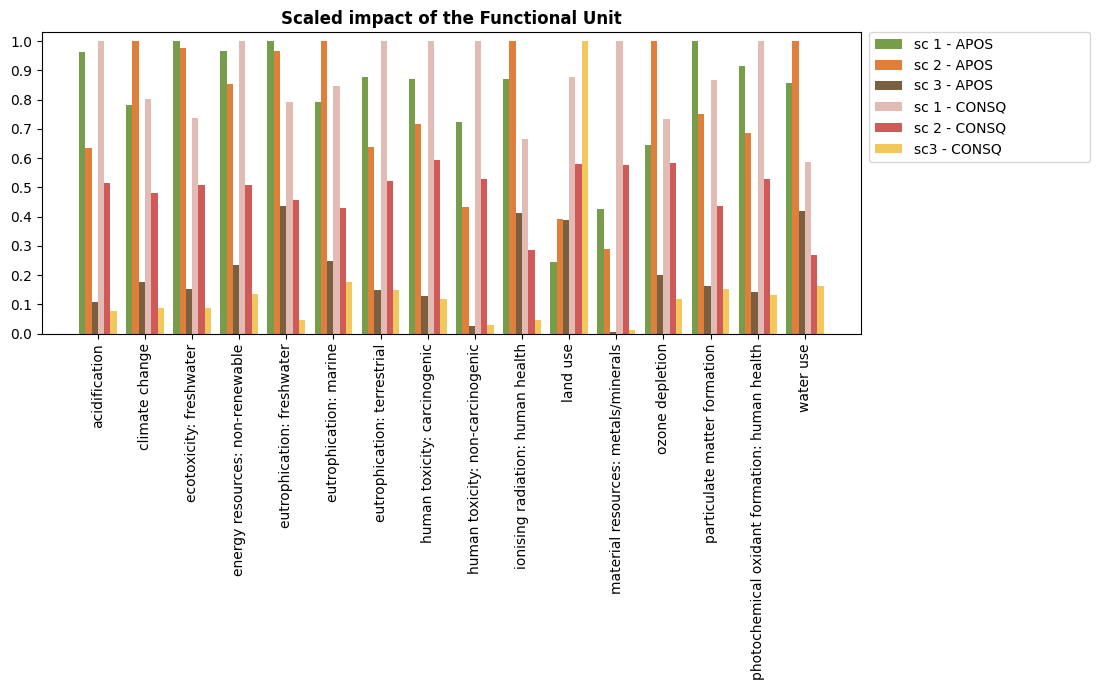

In [25]:


# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(df_norm)
bar_width = 1/(len(index_list) + 1.5) 
index = np.arange(len(columns_to_plot))



count = 3

# Plotting each group of bars
for i, process in enumerate(df_norm.index):
    values = df_norm.loc[process, columns_to_plot].values
    ax.bar((index + i * bar_width)-0.2, values, bar_width, label=process, color=colors[i])
    count += 3
    

# Setting labels and title
ax.set_title('Scaled impact of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(plot_x_axis)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0,1.03)

ax.legend(index_list,bbox_to_anchor=(1.01, .57, .27, 0), loc="lower left",
            mode="expand", borderaxespad=0,  ncol=1)
plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

In [26]:
file = r'D:\UNI\MILJOETEK\4. semester\Calculations - Copy\LCIA FU_.xlsx'

sheet2 = 'Norm + Weigh'

data_NW = pd.read_excel(file, sheet_name=sheet2)


In [27]:
norm_lst = data_NW['Normalization']
weigh_lst = data_NW['Weighting'].to_list
print(len(data_NW['Normalization']))

norm_lst = [0]*(len(data_NW['Normalization']))
weigh_lst = [0]*(len(data_NW['Weighting']))

for i in range(len(data_NW['Normalization'])):
    norm_lst[i] = data_NW['Normalization'][i]
    weigh_lst[i] = data_NW['Weighting'][i]



16


In [28]:
norm_df = pd.DataFrame().reindex_like(df) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
weigh_df = pd.DataFrame().reindex_like(df)

counter = 0
for i in df_cols:
    for j in range(len(df[df_cols[0]])):
        norm_df[i][j] =df[i][j] * norm_lst[counter]
        weigh_df[i][j] =norm_df[i][j] * weigh_lst[counter]
        #print(i, norm_df[i][j], weigh_df[i][j])
    counter +=1

lst = [0] * len(weigh_df[df_cols[0]])
for j in range(len(weigh_df[df_cols[0]])):
    for i in df_cols:
        lst[j] += weigh_df[i][j]
        #print(i,j)



C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\2599739618.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  norm_df[i][j] =df[i][j] * norm_lst[counter]
C:\Users\ruw\AppData\Local\Temp\5\ipykernel_110884\2599739618.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the as

In [29]:
lst_scaled = [0] * len(lst)
lst_max = max(lst)


for n in range(len(lst)):
    lst_scaled[n] = lst[n]/lst_max

lst_scaled

[0.5715038761675414,
 0.4542523296429392,
 0.0621569051274467,
 1.0,
 0.5690052496728407,
 0.03782182065543218]

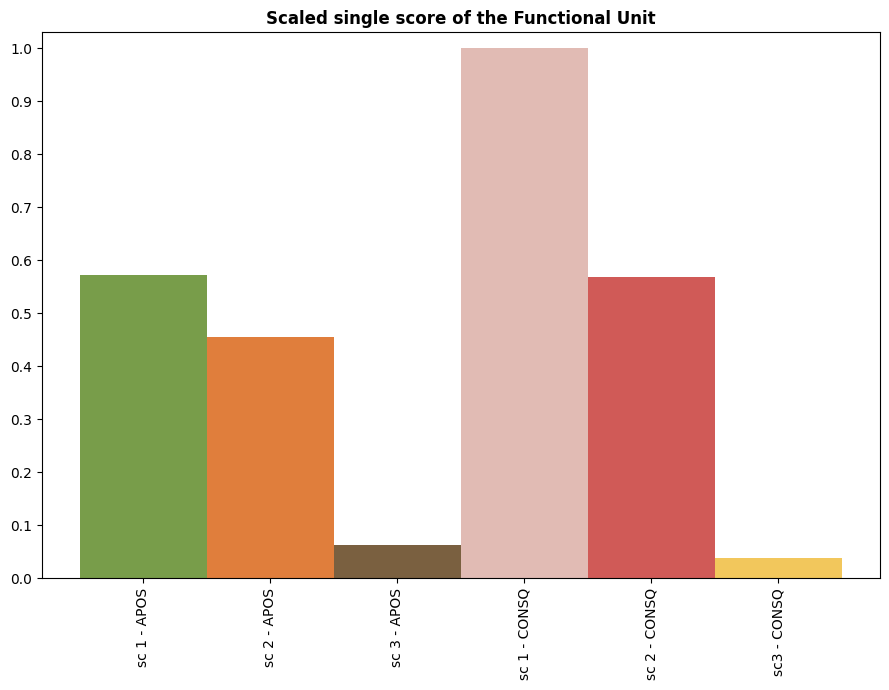

In [30]:


# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(df_norm)
bar_width = 1/(len(index_list)-5) 
index = np.arange(len(index_list))


# # Plotting each group of bars
# for i, process in enumerate(df_norm.index):
#     values = df_norm.loc[process, columns_to_plot].values
#     ax.bar((index + i * bar_width)-0.2, values, bar_width, label=process, color=colors[i])

# for j in range(len(lst_scaled)):
#     ax.bar((index + j * bar_width), lst_scaled[j], bar_width, label=index_list[j], color=colors[j])
   

ax.bar(index + bar_width, lst_scaled, bar_width, label=index_list, color=colors)

# Setting labels and title
ax.set_title('Scaled single score of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(index_list)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0,1.03)

# ax.legend(index_list,bbox_to_anchor=(1.01, .57, .27, 0), loc="lower left",
#             mode="expand", borderaxespad=0,  ncol=1)
plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

In [31]:
ca = bwa.ContributionAnalysis()
ca.annotated_top_processes(lca, limit=10) #returns a list of tuples: (lca score, supply amount, activity name)

[(0.07396693478730622,
  0.005453271758007729,
  'coconut production, dehusked' (kilogram, PH, None)),
 (0.01677459212563,
  0.037115338062409915,
  'palm fruit bunch production' (kilogram, RoW, None)),
 (0.014968736240628581,
  0.02058111062027456,
  'extrusion, plastic film' (kilogram, RER, None)),
 (0.013432484887171463,
  0.0020012263461210186,
  'coconut production, dehusked' (kilogram, ID, None)),
 (0.013032050105047373,
  0.001724070380938083,
  'coconut production, dehusked' (kilogram, RoW, None)),
 (-0.011601367679929244,
  -0.0016266374305011746,
  'barley production' (kilogram, RoW, None)),
 (0.009938161210302329,
  0.39757573537803104,
  'electricity production, wood, future' (kilowatt hour, GLO, None)),
 (0.009042446587457051,
  0.020058010912477775,
  'ethylene production, average' (kilogram, RER, None)),
 (0.008689529114761717,
  0.03180893863207475,
  'palm fruit bunch production' (kilogram, MY, None)),
 (0.005704741838712737,
  0.003100912597642635,
  'soda production,

In [32]:
lca.top_activities() #this command essentially relies on the annotated_top_process command from above. Hence, the output is given as (lca score, supply amount, activity name)

[(0.07396693478730622,
  0.005453271758007729,
  'coconut production, dehusked' (kilogram, PH, None)),
 (0.01677459212563,
  0.037115338062409915,
  'palm fruit bunch production' (kilogram, RoW, None)),
 (0.014968736240628581,
  0.02058111062027456,
  'extrusion, plastic film' (kilogram, RER, None)),
 (0.013432484887171463,
  0.0020012263461210186,
  'coconut production, dehusked' (kilogram, ID, None)),
 (0.013032050105047373,
  0.001724070380938083,
  'coconut production, dehusked' (kilogram, RoW, None)),
 (-0.011601367679929244,
  -0.0016266374305011746,
  'barley production' (kilogram, RoW, None)),
 (0.009938161210302329,
  0.39757573537803104,
  'electricity production, wood, future' (kilowatt hour, GLO, None)),
 (0.009042446587457051,
  0.020058010912477775,
  'ethylene production, average' (kilogram, RER, None)),
 (0.008689529114761717,
  0.03180893863207475,
  'palm fruit bunch production' (kilogram, MY, None)),
 (0.005704741838712737,
  0.003100912597642635,
  'soda production,